In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

Criação da classe Dados, que vai conter as informações

In [48]:
# Leitura de dados

class Dados:
        def __init__ (self, dados, dados_picos):
            self.dados = dados
            self.dados_picos = dados_picos

        #define os arrays com os dados
        def d(self):
            dados_array = np.array(self.dados)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(float(i[0]))
                y_data.append(float(i[1]))
            return data

        def dp(self):
            dados_array = np.array(self.dados_picos)
            x_data = []
            y_data = []
            data = [x_data,y_data]

            for i in dados_array:
                x_data.append(float(i[0]))
                y_data.append(float(i[1]))
            return data
        
        # faz o ajuste dos parâmetros da função de segundo grau
        def par(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return popt
        
        # erros dos parâmetros
        def perr(self):
            def func(x, A, B):
                return A*x + B
            popt, pcov = curve_fit(
                f = func,
                xdata = self.dp()[0],
                ydata = self.dp()[1]
            )
            return np.sqrt(np.diag(pcov))

        # define os valores de x e y da curva ajustada
        def x_model(self):
            return np.linspace(min(self.dp()[0]), max(self.dp()[0]))  

        def y_model(self):
            def func(x, A, B):
                return A*x + B
            return func(self.x_model(), self.par()[0], self.par()[1])
        

def tabela(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'.txt', sep="\s+", header = None)

def tabela_picos(nome_diretorio):
    return pd.read_csv('Dados/' + nome_diretorio +'-picos.txt', sep="\s+", header = None)


dados1 = Dados(tabela('zehg'), tabela_picos('zehg'))
dados2 = Dados(tabela('zeh'), tabela_picos('zeh'))

dados1.y_model()


array([3654.39907793, 3707.15324593, 3759.90741393, 3812.66158193,
       3865.41574994, 3918.16991794, 3970.92408594, 4023.67825394,
       4076.43242194, 4129.18658994, 4181.94075795, 4234.69492595,
       4287.44909395, 4340.20326195, 4392.95742995, 4445.71159796,
       4498.46576596, 4551.21993396, 4603.97410196, 4656.72826996,
       4709.48243796, 4762.23660597, 4814.99077397, 4867.74494197,
       4920.49910997, 4973.25327797, 5026.00744597, 5078.76161398,
       5131.51578198, 5184.26994998, 5237.02411798, 5289.77828598,
       5342.53245398, 5395.28662199, 5448.04078999, 5500.79495799,
       5553.54912599, 5606.30329399, 5659.057462  , 5711.81163   ,
       5764.565798  , 5817.319966  , 5870.074134  , 5922.828302  ,
       5975.58247001, 6028.33663801, 6081.09080601, 6133.84497401,
       6186.59914201, 6239.35331001])

In [49]:
# Definição da função a ser plotada
def func(x, A, B, C):
    return A*x**2 + B*x + C

In [50]:
# Cálculo dos parâmetros pelo curve_fit (minimos quadrados de função não linear)
popt, pcov = curve_fit(
    f = func,
    xdata = dados1.dp()[0],
    ydata = dados1.dp()[1],
#     sigma = Dy
)

A_p, B_p, C_p = popt
perr = np.sqrt(np.diag(pcov))
DA, DB, DC = perr

print("A:", A_p,"+-", DA)
print("B:", B_p,"+-", DB)
print("C:", C_p,"+-", DC)

A: -5.360569332868437e-07 +- 4.580052080961527e-06
B: 0.6192728237597278 +- 0.03407938475403748
C: 2665.724331298455 +- 54.36189620633328


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


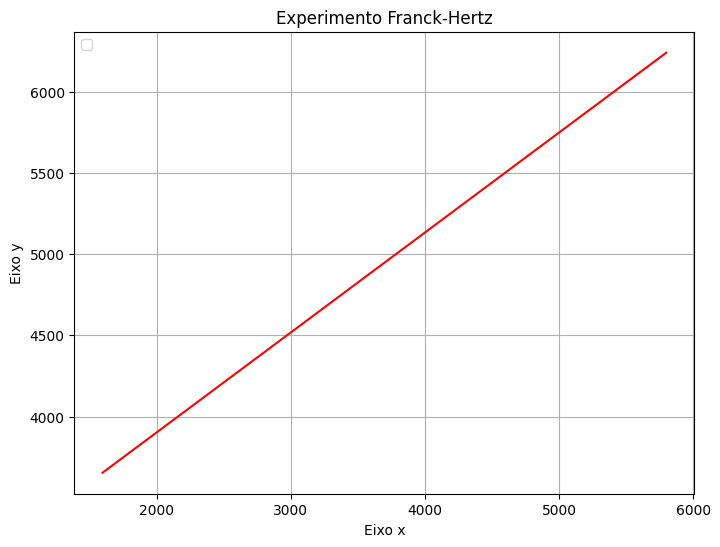

In [51]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
# grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'LightCoral')
# grafico2 = grafico.plot(dados2.d()[0], dados2.d()[1], 'D', marker = '.', color = 'LightBlue')

# plot do ajuste
grafico.plot(dados1.x_model(), dados1.y_model(),  color = 'red')
# grafico.plot(dados2.x_model(), dados2.y_model(),  color = 'blue', label = '$T= 180°C$; $V_r = 1,5 V$')

grafico.grid(True)
grafico.set_xlabel('Eixo x') # eixo x
grafico.set_ylabel('Eixo y') # eixo y
grafico.set_title('Espectroscpia') #título
grafico.legend(loc = 'upper left')

#    plt.savefig('Acr25graus.png')
plt.show()


/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_4093/2396478058.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  pontos = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'blue')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


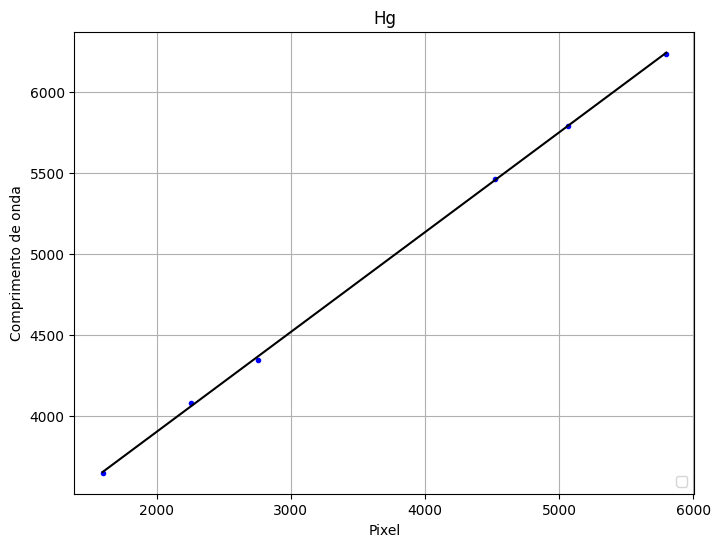

In [57]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
# grafico.plot(dados1.d()[0], dados1.d()[1], 'D', marker = '.', color = 'red')
pontos = grafico.plot(dados1.dp()[0], dados1.dp()[1], 'D', marker = '.', color = 'blue')
# plot do ajuste
grafico.plot(dados1.x_model(), dados1.y_model(),  color = 'black')

grafico.grid(True)
grafico.set_xlabel('Pixel') # eixo x
grafico.set_ylabel('Comprimento de onda') # eixo y
grafico.set_title('Hg') #título
grafico.legend(loc = 'lower right')



plt.show()


In [56]:

print(dados1.par(),dados1.perr())

[6.15318789e-01 2.67173497e+03] [3.89084568e-03 1.54760572e+01]


In [ ]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
# grafico.plot(dados2.d()[0], dados2.d()[1], 'D', marker = '.', color = 'red')
pontos = grafico.plot(dados2.dp()[0], dados2.dp()[1], 'D', marker = '.', color = 'blue')
# plot do ajuste
grafico.plot(dados2.x_model(), dados2.y_model(),  color = 'black')
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
grafico.set_xlabel('Pixel') # eixo x
grafico.set_ylabel('Comprimento de onda') # eixo y
grafico.set_title('H') #título
grafico.legend(loc = 'lower right')

plt.show()


In [ ]:

print(dados2.par(),dados2.perr())

In [53]:
# x_ajuste = np.interp(dados1.dp()[1], yModel, xModel)

# x_ajuste = np.array(x_ajuste)

# x_ajuste

# len(dados1.dp()[1])
# y_ajuste = np.linspace(1, len(dados1.dp()[1]), len(dados1.dp()[1]))

def func2(y, A, B, C):
    a = A**(1/2)
    b = B/(2*a)
    c = C - b**2
    # return [a, b, c]
    return ((y-c)**(1/2) - b)/a

pontos = func2(dados1.dp()[1], dados1.par()[0], dados1.par()[1], dados1.par()[2])

dados1.par()
pontos


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
# Definição da função a ser plotada
def func(x, A, B):
    return A*x + B

In [ ]:
# # Cálculo dos parâmetros pelo curve_fit (minimos quadrados de função não linear)
# popt, pcov = curve_fit(
#     f = func,
#     xdata = np.linspace(1, len(dados1.dp()[1]), len(dados1.dp()[1])),
#     ydata = x_ajuste,
# )

# A_p, B_p= popt
# perr = np.sqrt(np.diag(pcov))
# DA, DB = perr

# print("A:", A_p,"+-", DA)
# print("B:", B_p,"+-", DB)

In [ ]:
dados1.x_ajuste()

array([10.59765981, 15.08816066, 19.57005694, 24.21559097, 28.82676025])

/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75640/1075522475.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico1 = grafico.plot(dados1.y_ajuste(), dados1.x_ajuste(), 'D', marker = '.', color = 'red')
/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75640/1075522475.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(dados2.y_ajuste(), dados2.x_ajuste(), 'D', marker = '.', color = 'green')
/var/folders/_9/m4dclz294qd9wj153syslw6w0000gp/T/ipykernel_75640/1075522475.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(dados3.y_ajuste(), dados3.x_ajuste(), 'D', marker = '.', color = 'blue')


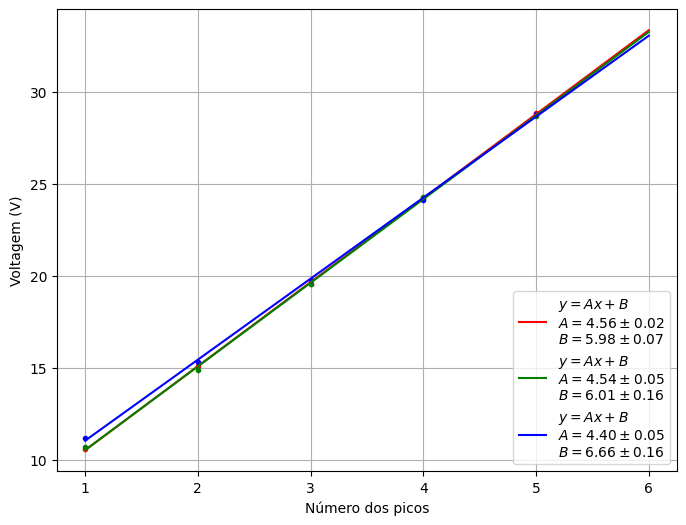

In [ ]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos
grafico1 = grafico.plot(dados1.y_ajuste(), dados1.x_ajuste(), 'D', marker = '.', color = 'red')
grafico.plot(dados2.y_ajuste(), dados2.x_ajuste(), 'D', marker = '.', color = 'green')
grafico.plot(dados3.y_ajuste(), dados3.x_ajuste(), 'D', marker = '.', color = 'blue')

# plot do ajuste
grafico.plot(dados1.x_model_reta(), dados1.y_model_reta(),  color = 'red', label = f"$y = Ax + B$ \n$A = {dados1.par_reta()[0]: .2f} \pm {dados1.perr_reta()[0]: .2f} $\n$B = {dados1.par_reta()[1]: .2f} \pm {dados1.perr_reta()[1]: .2f}$")
grafico.plot(dados2.x_model_reta(), dados2.y_model_reta(),  color = 'green', label = f"$y = Ax + B$ \n$A = {dados2.par_reta()[0]: .2f} \pm {dados2.perr_reta()[0]: .2f} $\n$B = {dados2.par_reta()[1]: .2f} \pm {dados2.perr_reta()[1]: .2f}$")
grafico.plot(dados3.x_model_reta(), dados3.y_model_reta(),  color = 'blue', label = f"$y = Ax + B$ \n$A = {dados3.par_reta()[0]: .2f} \pm {dados3.perr_reta()[0]: .2f} $\n$B = {dados3.par_reta()[1]: .2f} \pm {dados3.perr_reta()[1]: .2f}$")
#    grafico.errorbar(xData, yData, ls='None', color = 'red')
grafico.grid(True)
grafico.set_xlabel('Número dos picos') # eixo x
grafico.set_ylabel('Voltagem (V)') # eixo y
#    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência de 25°)')
grafico.legend(loc = 'lower right')

#    plt.savefig('Acr25graus.png')
plt.show()